# Precio umbral 

In [1]:
import numpy as np
import pandas as pd
import pandas_datareader as data
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Creamos la función
def load_adj_close(ticker, data_source, start_date, end_date):
    panel_data = data.DataReader(ticker, data_source, start_date, end_date)
    closes = panel_data.loc['Adj Close']
    all_weekdays = pd.date_range(start=start_date, end=end_date)
    closes = closes.reindex(all_weekdays)
    closes = closes.fillna(method='ffill')
    return closes

In [4]:
# Descargamos datos de microsoft en el 2016
ticker = ['NVDA']
data_source = 'yahoo'
start_date = '2016-01-04'
end_date = '2016-12-31'
closes = load_adj_close(ticker, data_source, start_date, end_date)

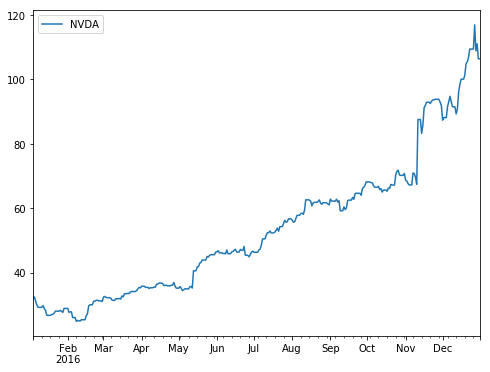

In [5]:
# Grafiquemos
closes.plot(figsize=(8,6));

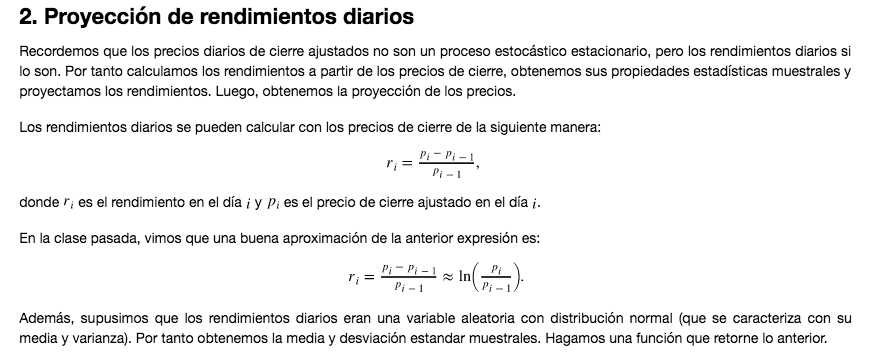

In [11]:
closes.head()

,NVDA
2016-01-04,31.959547
2016-01-05,32.472950
2016-01-06,31.130199
2016-01-07,29.896048
2016-01-08,29.254288


In [24]:
np.log(32.472950/31.959547)

0.015936488252863753

In [17]:
closes.shift(1).head()

,NVDA
2016-01-04,NaN
2016-01-05,31.959547
2016-01-06,32.472950
2016-01-07,31.130199
2016-01-08,29.896048


In [39]:
daily_returns = (np.log(closes/closes.shift(1)))
daily_returns[1:].shape,daily_returns.shape

((362, 1), (363, 1))

In [44]:
daily_returns.mean()[0]

0.0033224614879625229

In [6]:

# Función que devuelve rendimientos diarios, media y desviación estándar
def mu_std_daily_ret(closes):
    daily_returns = (np.log(closes/closes.shift(1)))[1:]
    mu = daily_returns.mean().values[0]
    sigma = daily_returns.std().values[0]
    return daily_returns, mu, sigma

In [8]:
# Calculamos con la función anterior
daily_returns, mu, sigma = mu_std_daily_ret(closes)
mu, sigma

(0.0033224614879625229, 0.023412153511648267)

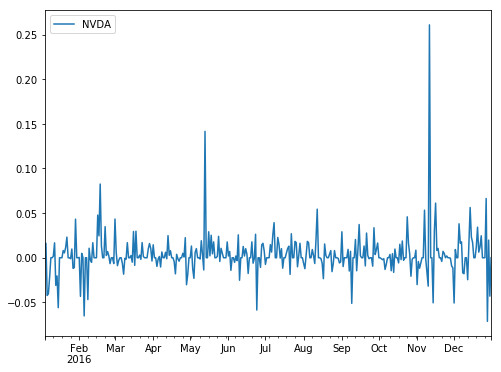

In [45]:
# Graficamos rendimientos diarios
daily_returns.plot(figsize=(8,6));

Habiendo caracterizado los rendimientos diarios como una variable aleatoria normal con la media y la varianza muestral obtenida de los datos del 2016, podemos generar números aleatorios con estas características para simular el comportamiento de los precios de cierre de las acciones en el 2017 (hay un supuesto de que las cosas no cambiarán fundamentalmente).
Sin embargo, cada simulación que hagamos nos conducirá a distintos resultados (los precios siguen evolucionando aleatoriamente). Entonces, lo que haremos es simular varios escenarios para así ver alguna tendencia y tomar decisiones.
Hagamos una una función que simule varios escenarios de rendimientos diarios rendimientos diarios y que devuelva un dataframe con esta simulación.

In [46]:
# Función que simula varios escenarios de rendimientos diarios
def daily_ret_sim(mu, sigma, ndays, ntraj, start_date):
    dates = pd.date_range(start=start_date,periods=ndays)
    return pd.DataFrame(sigma*np.random.randn(ndays, ntraj)+mu, index = dates)

In [91]:
# Simulamos 100 escenarios para todo el 2017
ndays = 360
ntraj = 100
start_date = '2017-01-01'
simret = daily_ret_sim(mu, sigma, ndays, ntraj, start_date)
simret.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2017-01-01,-0.018589,-0.039422,-0.040056,-0.042519,0.020878,-0.038597,-0.014871,0.040134,0.002885,-0.015288,...,0.002823,0.050000,0.028533,0.018906,0.040308,0.021521,0.033038,-0.007894,0.018708,-0.030698
2017-01-02,-0.028572,0.019549,-0.037259,-0.004449,0.027470,0.007698,-0.004597,-0.035035,0.021826,-0.015972,...,0.004070,0.021483,0.012508,0.041511,-0.013400,0.003325,0.003800,0.025945,-0.049329,0.033108
2017-01-03,-0.008078,-0.000441,0.006750,-0.001671,-0.002647,0.001613,0.020086,0.005378,0.003125,-0.002193,...,-0.025629,0.040137,-0.033321,0.016801,0.015938,-0.018920,-0.024586,-0.032505,-0.020284,-0.024219
2017-01-04,0.037769,0.000507,-0.002883,-0.016303,0.021861,0.027523,0.003533,0.001351,0.030559,0.009238,...,0.005757,0.036526,0.019150,0.012212,-0.002935,0.037596,-0.001601,0.001767,0.037375,0.026250
2017-01-05,-0.016522,-0.042540,-0.020344,0.052819,0.024594,0.017127,-0.011225,-0.000072,0.019641,0.011613,...,-0.006669,-0.015771,0.004352,-0.008593,0.011343,-0.010430,0.032578,0.057350,0.003757,0.034561


In [90]:
# pd.DataFrame(sigma*np.random.randn(ndays, ntraj)+mu, index = dates)
    

In [81]:
dates = pd.date_range(start='2017-01-01',periods=360)
p1 =pd.DataFrame(sigma*np.random.randn(360, 100)+mu, index = dates)
p1.head()
p2.mean(axis=1).head()

2017-01-01    0.003419
2017-01-02    0.005544
2017-01-03    0.005492
2017-01-04    0.000919
2017-01-05    0.002719
Freq: D, dtype: float64

In [86]:
p2 =pd.DataFrame(np.random.normal(mu,sigma,(360,100)), index = dates)
p2.head()
p2.mean(axis=1).head()

2017-01-01   -0.001059
2017-01-02   -0.000903
2017-01-03    0.003796
2017-01-04    0.003846
2017-01-05    0.002145
Freq: D, dtype: float64

In [87]:
# Función de proyección de precios
def closes_proj(simret, closes):
    return (closes.iloc[-1,:].values[0])*np.exp(simret.cumsum())

In [93]:
simret.cumsum().head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2017-01-01,-0.018589,-0.039422,-0.040056,-0.042519,0.020878,-0.038597,-0.014871,0.040134,0.002885,-0.015288,...,0.002823,0.050000,0.028533,0.018906,0.040308,0.021521,0.033038,-0.007894,0.018708,-0.030698
2017-01-02,-0.047161,-0.019873,-0.077315,-0.046967,0.048349,-0.030898,-0.019468,0.005099,0.024711,-0.031260,...,0.006893,0.071483,0.041041,0.060417,0.026908,0.024846,0.036839,0.018051,-0.030620,0.002410
2017-01-03,-0.055239,-0.020315,-0.070565,-0.048638,0.045702,-0.029286,0.000618,0.010477,0.027836,-0.033453,...,-0.018735,0.111620,0.007720,0.077218,0.042846,0.005926,0.012252,-0.014454,-0.050905,-0.021809
2017-01-04,-0.017470,-0.019807,-0.073447,-0.064941,0.067563,-0.001763,0.004151,0.011828,0.058395,-0.024214,...,-0.012978,0.148146,0.026870,0.089429,0.039912,0.043522,0.010651,-0.012687,-0.013529,0.004441
2017-01-05,-0.033992,-0.062347,-0.093792,-0.012122,0.092157,0.015365,-0.007074,0.011757,0.078036,-0.012601,...,-0.019647,0.132375,0.031222,0.080836,0.051255,0.033092,0.043230,0.044663,-0.009773,0.039002


In [95]:
np.exp(simret.cumsum()).head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2017-01-01,0.981583,0.961344,0.960736,0.958373,1.021098,0.962139,0.985239,1.040951,1.002889,0.984828,...,1.002827,1.051271,1.028944,1.019085,1.041132,1.021755,1.033590,0.992137,1.018885,0.969769
2017-01-02,0.953934,0.980323,0.925599,0.954119,1.049537,0.969574,0.980720,1.005113,1.025019,0.969223,...,1.006917,1.074100,1.041895,1.062279,1.027273,1.025157,1.037526,1.018215,0.969844,1.002413
2017-01-03,0.946259,0.979890,0.931867,0.952525,1.046762,0.971139,1.000618,1.010532,1.028227,0.967101,...,0.981439,1.118088,1.007750,1.080277,1.043777,1.005943,1.012328,0.985650,0.950369,0.978427
2017-01-04,0.982681,0.980387,0.929185,0.937123,1.069898,0.998239,1.004160,1.011899,1.060134,0.976077,...,0.987106,1.159682,1.027235,1.093550,1.040719,1.044483,1.010708,0.987393,0.986562,1.004451
2017-01-05,0.966579,0.939557,0.910472,0.987951,1.096537,1.015483,0.992951,1.011826,1.081161,0.987478,...,0.980545,1.141536,1.031715,1.084193,1.052591,1.033645,1.044178,1.045675,0.990275,1.039772


In [96]:
(closes.iloc[-1,:].values[0])

106.39962

In [99]:
# Proyección de precios y concatenación con precios de 2016
simdata = closes_proj(simret, closes)
simdata.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2017-01-01,104.440058,102.286687,102.221922,101.970493,108.644430,102.371207,104.829087,110.756757,106.707039,104.785374,...,106.700428,111.854887,109.479273,108.430295,110.776002,108.714292,109.973600,105.562983,108.408930,103.183008
2017-01-02,101.498215,104.305964,98.483348,101.517883,111.670291,103.162325,104.348243,106.943590,109.061630,103.125002,...,107.135601,114.283833,110.857189,113.026080,109.301477,109.076333,110.392349,108.337664,103.190995,106.656347
2017-01-03,100.681614,104.259960,99.150329,101.348347,111.375099,103.328813,106.465425,107.520261,109.402979,102.899148,...,104.424742,118.964103,107.224224,114.941102,111.057524,107.031987,107.711296,104.872803,101.118932,104.104235
2017-01-04,104.556936,104.312856,98.864936,99.709481,113.836693,106.212253,106.842237,107.665631,112.797814,103.854186,...,105.027660,123.389733,109.297371,116.353322,110.732080,111.132543,107.538966,105.058240,104.969801,106.873205
2017-01-05,102.843639,99.968459,96.873913,105.117638,116.671072,108.047057,105.649620,107.657901,115.035171,105.067244,...,104.329611,121.459006,109.774071,115.357749,111.995315,109.979451,111.100107,111.259429,105.364892,110.631374


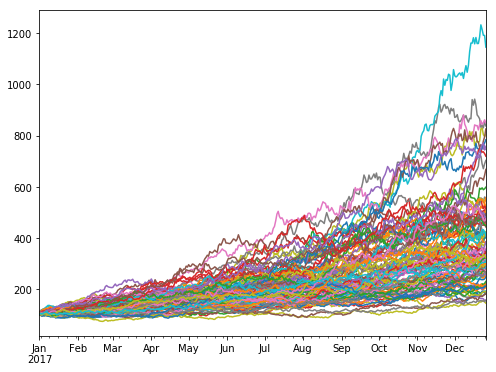

In [98]:
# Gráfico
simdata.plot(figsize=(8,6),legend=False);

In [106]:
K = 200
#strike = pd.DataFrame({'Strike':K*np.ones(ndays)},index=dates)
strike = pd.DataFrame({'Strike':K},index=dates)
strike.shape

(360, 1)

In [116]:
simul = pd.concat([closes.T,simdata.T,strike.T]).T
simul.shape,closes.shape,simdata.shape

((723, 102), (363, 1), (360, 100))

In [122]:
closes.head()

,NVDA
2016-01-04,31.959547
2016-01-05,32.472950
2016-01-06,31.130199
2016-01-07,29.896048
2016-01-08,29.254288


In [124]:
simdata.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
2017-01-01,104.440058,102.286687,102.221922,101.970493,108.644430,102.371207,104.829087,110.756757,106.707039,104.785374,...,106.700428,111.854887,109.479273,108.430295,110.776002,108.714292,109.973600,105.562983,108.408930,103.183008
2017-01-02,101.498215,104.305964,98.483348,101.517883,111.670291,103.162325,104.348243,106.943590,109.061630,103.125002,...,107.135601,114.283833,110.857189,113.026080,109.301477,109.076333,110.392349,108.337664,103.190995,106.656347
2017-01-03,100.681614,104.259960,99.150329,101.348347,111.375099,103.328813,106.465425,107.520261,109.402979,102.899148,...,104.424742,118.964103,107.224224,114.941102,111.057524,107.031987,107.711296,104.872803,101.118932,104.104235
2017-01-04,104.556936,104.312856,98.864936,99.709481,113.836693,106.212253,106.842237,107.665631,112.797814,103.854186,...,105.027660,123.389733,109.297371,116.353322,110.732080,111.132543,107.538966,105.058240,104.969801,106.873205
2017-01-05,102.843639,99.968459,96.873913,105.117638,116.671072,108.047057,105.649620,107.657901,115.035171,105.067244,...,104.329611,121.459006,109.774071,115.357749,111.995315,109.979451,111.100107,111.259429,105.364892,110.631374


In [129]:
a = pd.concat([closes,simdata,strike],axis=1)
a.shape

(723, 102)

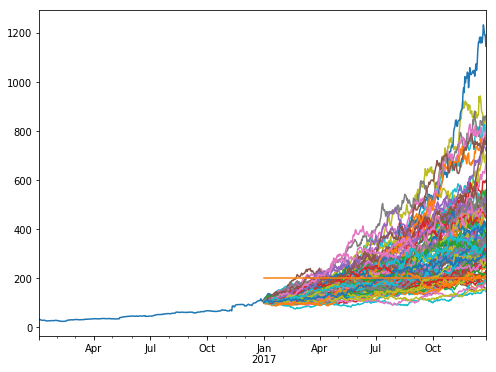

In [130]:
a.plot(figsize=(8,6),legend=False);

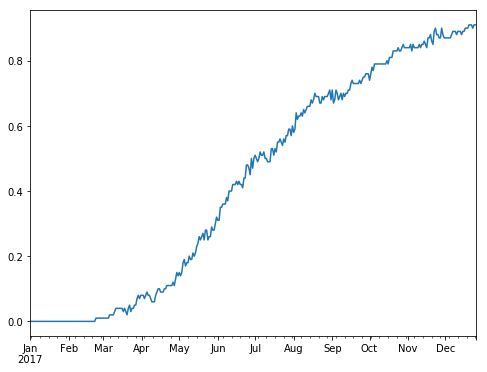

In [147]:
strike = pd.DataFrame(K*np.ones(ndays*ntraj).reshape((ndays,ntraj)),index=dates)
strike.shape
count = simdata>strike
prob = count.T.sum()/ntraj
prob.plot(figsize=(8,6),legend=False);

In [155]:
strike = pd.DataFrame(K*np.ones(ndays*ntraj).reshape((ndays,ntraj)),index=dates)
strike.shape
count = simdata>strike
prob = count.T.sum()/ntraj

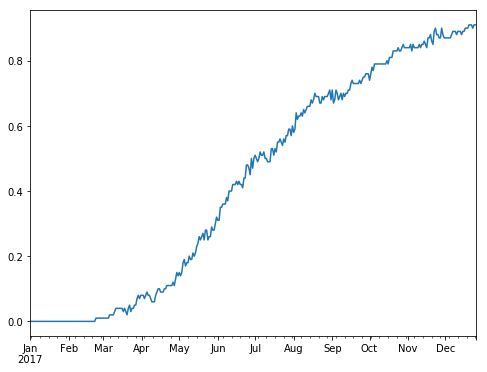

In [178]:
prob2 = (simdata > 200).sum(axis=1)/100
prob2.plot(figsize=(8,6));

In [157]:
prob2 = (simdata[simdata > 200].sum(axis=1)/100)


In [161]:
sum( np.array([1,2,3]) == np.array([1,4,3]) )

2

In [ ]:
simdata

In [152]:
((K-closes.iloc[-1,:])/closes.iloc[-1,:]).values

array([ 0.87970596])

In [154]:
closes.iloc[-1,:]

NVDA    106.39962
Name: 2016-12-31 00:00:00, dtype: float64

In [149]:
ntraj

100

In [137]:
strike = pd.DataFrame(K*np.ones(ndays*ntraj).reshape((ndays,ntraj)) ,index=dates)
strike.shape

(360, 100)

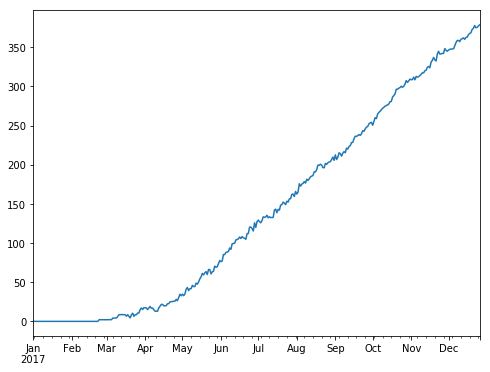

In [151]:
(simdata[simdata > 200].sum(axis=1)/100).plot(figsize=(8,6),legend=False);

In [119]:
pd.concat?

In [118]:
s1 = pd.Series(['a', 'b'])
s2 = pd.Series(['c', 'd'])
pd.concat([s1, s2])

0    a
1    b
0    c
1    d
dtype: object

In [108]:
closes.T

,2016-01-04 00:00:00,2016-01-05 00:00:00,2016-01-06 00:00:00,2016-01-07 00:00:00,2016-01-08 00:00:00,2016-01-09 00:00:00,2016-01-10 00:00:00,2016-01-11 00:00:00,2016-01-12 00:00:00,2016-01-13 00:00:00,...,2016-12-22 00:00:00,2016-12-23 00:00:00,2016-12-24 00:00:00,2016-12-25 00:00:00,2016-12-26 00:00:00,2016-12-27 00:00:00,2016-12-28 00:00:00,2016-12-29 00:00:00,2016-12-30 00:00:00,2016-12-31 00:00:00
NVDA,31.959547,32.47295,31.130199,29.896048,29.254288,29.254288,29.254288,29.303656,29.797318,28.888983,...,106.76844,109.429932,109.429932,109.429932,109.429932,116.945885,108.901627,111.074669,106.39962,106.39962


In [109]:
simdata.T

,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,...,2017-12-17 00:00:00,2017-12-18 00:00:00,2017-12-19 00:00:00,2017-12-20 00:00:00,2017-12-21 00:00:00,2017-12-22 00:00:00,2017-12-23 00:00:00,2017-12-24 00:00:00,2017-12-25 00:00:00,2017-12-26 00:00:00
0,104.440058,101.498215,100.681614,104.556936,102.843639,101.436974,98.094616,103.557265,108.153803,106.945581,...,335.910480,337.765639,337.577264,328.174609,327.738359,330.153650,333.337621,347.387306,336.763513,340.360906
1,102.286687,104.305964,104.259960,104.312856,99.968459,100.884473,102.994405,106.821323,106.823539,105.096988,...,445.898570,468.546559,469.974178,471.642996,507.599918,525.226274,517.023467,516.663313,536.677379,523.374329
2,102.221922,98.483348,99.150329,98.864936,96.873913,99.916717,98.978824,102.110677,101.647389,105.618795,...,410.370428,409.009396,396.568299,397.724286,382.703566,382.794727,387.667708,383.263568,404.003061,411.382084
3,101.970493,101.517883,101.348347,99.709481,105.117638,101.507246,99.946504,100.198143,103.012346,107.426154,...,306.078400,319.951600,327.622331,328.786906,326.875209,320.193773,319.086819,324.756507,323.292921,331.042230
4,108.644430,111.670291,111.375099,113.836693,116.671072,117.399729,119.637975,115.165977,117.190016,117.581141,...,307.906917,304.660879,314.409349,303.586777,298.003321,312.570566,309.697370,312.705948,315.359376,318.373349
5,102.371207,103.162325,103.328813,106.212253,108.047057,105.570183,101.047296,99.470186,98.578808,98.225789,...,408.296796,410.427589,420.603982,411.346038,415.130509,446.632270,452.625416,452.116698,454.982766,444.079874
6,104.829087,104.348243,106.465425,106.842237,105.649620,107.869289,105.518893,104.992008,105.621939,102.933566,...,258.991707,260.329435,271.115898,268.550138,264.231005,283.643939,291.127054,283.617196,287.163551,290.193909
7,110.756757,106.943590,107.520261,107.665631,107.657901,105.603969,104.921865,106.446036,103.669740,100.328904,...,179.218139,176.924159,175.970865,178.422326,174.222677,176.444704,176.130421,177.248077,182.818170,181.428355
8,106.707039,109.061630,109.402979,112.797814,115.035171,119.578181,122.510872,124.416762,128.537431,128.477971,...,515.161502,521.748999,503.105848,483.648944,488.239881,499.239359,498.823966,503.175232,501.188097,507.487629
9,104.785374,103.125002,102.899148,103.854186,105.067244,104.689509,106.064424,107.704136,106.120104,102.606212,...,315.251447,315.058582,309.490990,306.322530,316.970504,320.195935,317.444846,317.620464,309.754967,317.110735


In [110]:
strike.T

,2017-01-01 00:00:00,2017-01-02 00:00:00,2017-01-03 00:00:00,2017-01-04 00:00:00,2017-01-05 00:00:00,2017-01-06 00:00:00,2017-01-07 00:00:00,2017-01-08 00:00:00,2017-01-09 00:00:00,2017-01-10 00:00:00,...,2017-12-17 00:00:00,2017-12-18 00:00:00,2017-12-19 00:00:00,2017-12-20 00:00:00,2017-12-21 00:00:00,2017-12-22 00:00:00,2017-12-23 00:00:00,2017-12-24 00:00:00,2017-12-25 00:00:00,2017-12-26 00:00:00
Strike,200,200,200,200,200,200,200,200,200,200,...,200,200,200,200,200,200,200,200,200,200
